In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
import scipy.stats as stats
from sklearn.model_selection import train_test_split


%store -r df1

In [49]:
df1.describe()

,distance_seattle,property_age,rooms_per_floor,sqft_lot,sqft_living,price,renovation_1,renovation_unknown,waterfront_1,waterfront_unknown
count,14328.000000,14328.000000,14328.000000,1.432800e+04,14328.000000,14328.000000,14328.000000,14328.000000,14328.000000,14328.000000
mean,10.637792,47.677136,3.708012,1.070549e+04,1685.060441,430268.904453,0.028197,0.179299,0.002443,0.110483
std,5.885533,29.764941,1.133331,2.541274e+04,527.717693,163521.948393,0.165540,0.383616,0.049366,0.313502
min,0.330000,-1.000000,0.750000,5.200000e+02,370.000000,78000.000000,0.000000,0.000000,0.000000,0.000000
25%,5.490000,23.000000,2.750000,4.534000e+03,1280.000000,300000.000000,0.000000,0.000000,0.000000,0.000000
50%,9.850000,47.000000,3.380000,7.110000e+03,1650.000000,409900.000000,0.000000,0.000000,0.000000,0.000000
75%,15.220000,67.000000,4.750000,9.450000e+03,2080.000000,540625.000000,0.000000,0.000000,0.000000,0.000000
max,22.810000,115.000000,6.000000,1.164794e+06,2830.000000,873000.000000,1.000000,1.000000,1.000000,1.000000


In [39]:
x_variables = ['sqft_lot', 'distance_seattle', 'property_age', 'waterfront_1', 'renovation_1']
X = df1[x_variables] 

In [40]:
pd.Series([variance_inflation_factor(X.values, i) for i in range(X.shape[1])],
          index=X.columns)

sqft_lot            1.244617
distance_seattle    1.893356
property_age        1.776431
waterfront_1        1.006974
renovation_1        1.062608
dtype: float64

In [41]:
outcome = 'price'
x_variables = ['sqft_lot', 'distance_seattle','property_age', 'waterfront_1', 'renovation_1']

predictors = '+'.join(x_variables)
formula = outcome + '~' + predictors + '-1'
model = ols(formula=formula, data=df1).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.734
Model:                            OLS   Adj. R-squared (uncentered):              0.734
Method:                 Least Squares   F-statistic:                              7916.
Date:                Tue, 06 Oct 2020   Prob (F-statistic):                        0.00
Time:                        15:10:20   Log-Likelihood:                     -1.9767e+05
No. Observations:               14328   AIC:                                  3.953e+05
Df Residuals:                   14323   BIC:                                  3.954e+05
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
sqft_lot             0.5197      0.080      6.479      0.000       0.362       0.677
distance_seattle  1.505e+04    224.389     67.088      0.000    1.46e+04    1.55e+04
property_age      4330.9496     47.013     92.121      0.000    4238.797    4423.102
waterfront_1      3.935e+04   4.03e+04      0.978      0.328   -3.96e+04    1.18e+05
renovation_1        3.5e+04   1.22e+04      2.876      0.004    1.11e+04    5.89e+04
==============================================================================
Omnibus:                      173.044   Durbin-Watson:                   1.701
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              140.252
Skew:                           0.170   Prob(JB):                     3.50e-31
Kurtosis:                       2.655   Cond. No.                     5.60e+05
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 5.6e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

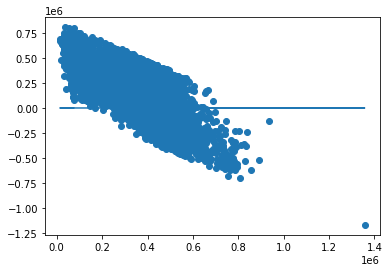

In [42]:
plt.scatter(model.predict(df1[x_variables]), model.resid)
plt.plot(model.predict(df1[x_variables]), [0 for i in range(len(df1))])

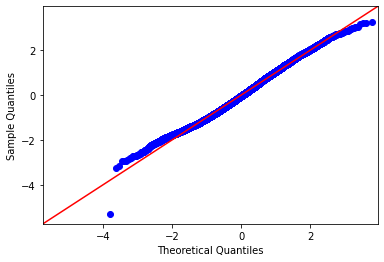

In [43]:
fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)